# TEMPLATE 1 - PREPROCESSING

# Libraries

In [1]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.options.display.max_columns = 100 # para visualizar mas columnas en un df
pd.options.display.max_rows = 100 # para visualizar mas filas en un df
pd.options.display.max_colwidth = None # quitamos el límite del ancho de columnas

import pickle

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

In [2]:
import sklearn
from sklearn import set_config

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(transform_output = "pandas")

In [3]:
drive.mount('/content/drive') # Nos conectamos a nuestro drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cambiar por la ruta de la carpeta raíz del proyecto
FOLDER_PATH = '/content/drive/MyDrive/MASTER DATA SCIENCE/ML SUPERVISADO/“DSC{1122} – Entregable SupML - {Blanch, Parals, Ramos, Romans}”'

# Import data



*   **Leemos dataset de train/test**



In [5]:
df = pd.read_csv(FOLDER_PATH + '/data/telecom_churn_TRAINTEST.csv', index_col='Customer_ID')

In [6]:
df.head(4)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null

In [8]:
df.shape

(90000, 99)



*   **Leemos Diccionario de variables**



In [9]:
dict_features = pd.read_csv(FOLDER_PATH + '/data/variable_dictionary.csv', index_col = 'Variable')

In [10]:
dict_features

,Description
Variable,
rev,Mean monthly revenue (charge amount)
mou,Mean number of monthly minutes of use
totmrc,Mean total monthly recurring charge
da,Mean number of directory assisted calls
ovrmou,Mean overage minutes of use
ovrrev,Mean overage revenue
vceovr,Mean revenue of voice overage
datovr,Mean revenue of data overage
roam,Mean number of roaming calls


# Define target

Separamos el target de las features

In [11]:
target = 'churn'
features = df.columns[df.columns!=target]

In [12]:
X = df[features]
y = df[target]

# Preprocessing

## Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categóricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numéricas (hour, day, month, year...) o categóricas (weekday_name...)

In [13]:
len(X[X.duplicated()])

0

In [14]:
X.isnull().sum()

rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            595
change_rev            595
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav                0
mou_pead    

Vemos que no tenemos valores duplicados. Por lo que se refiere a los nulos, decidimos eliminar las columnas con más de 20.000 valores nulos ya que opinamos que falta mucha información y imputar tantos nulos modificaría el resultado.  

In [15]:
X=X.drop(X.columns[X.isnull().sum() > 20000], axis=1)

In [16]:
numeric_columns = X.select_dtypes(include = np.number).columns.tolist()
object_columns = X.select_dtypes(exclude = np.number).columns.tolist()

Aplicamos un transformer en las columnas numéricas. Primero imputamos los nulos por la media y luego hacemos un StandardScaler. Al crear el transformer, lo podemos juntar posteriormente en un pipe y tenerlo guardado para cuando lo necesitemos. 

In [17]:
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler())
    ]
)

## EDA: Analysis

### Target distribution

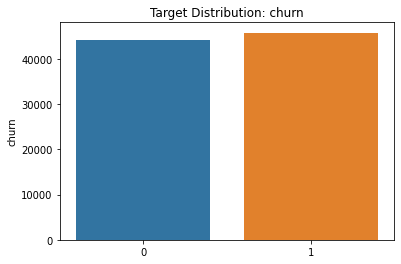

In [18]:
counter = pd.DataFrame(y.value_counts())

sns.barplot(x=counter.index, y=target, data=counter)
plt.title('Target Distribution: '+target)
plt.show()

Observamos que el dataset está bastante balanceado.

### Univariate analysis

* En numéricas .describe() para describir, KDEplots, distplots o histogramas en variables numéricas para visualizar.
* En categóricas .value_counts() para describir, countplots o barplots para visualizar.

In [19]:
describe_df = df.describe().T
describe_df.merge(dict_features, left_index=True, right_index=True,how='left')

,count,mean,std,min,25%,50%,75%,max,Description
rev,89866.0,58.312895,46.084103,-5.862500,33.027500,47.667500,70.193750,3843.262500,Mean monthly revenue (charge amount)
mou,89866.0,504.277946,516.170057,0.000000,148.500000,349.000000,689.000000,12206.750000,Mean number of monthly minutes of use
totmrc,89866.0,45.880669,23.370435,-26.915000,30.000000,44.990000,59.990000,409.990000,Mean total monthly recurring charge
da,89866.0,0.877813,2.173665,0.000000,0.000000,0.247500,0.742500,159.390000,Mean number of directory assisted calls
ovrmou,89866.0,40.798976,96.970619,0.000000,0.000000,2.500000,41.250000,4320.750000,Mean overage minutes of use
ovrrev,89866.0,13.289932,30.123282,0.000000,0.000000,0.900000,13.912500,1102.400000,Mean overage revenue
vceovr,89866.0,13.046046,29.719581,0.000000,0.000000,0.600000,13.562500,896.087500,Mean revenue of voice overage
datovr,89866.0,0.240786,3.012631,0.000000,0.000000,0.000000,0.000000,423.540000,Mean revenue of data overage
roam,89866.0,1.308197,15.374215,0.000000,0.000000,0.000000,0.257500,3685.200000,Mean number of roaming calls
change_mou,89405.0,-13.786987,271.624916,-3875.000000,-85.750000,-6.500000,61.250000,31219.250000,Percentage change in monthly minutes of use vs previous three month average


In [20]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts().to_frame())
  print(dict_features.loc[i])
  print('----------------------')

   new_cell
U     58812
Y     18114
N     13074
 Description     New cell phone user
Name: new_cell, dtype: object
----------------------
    crclscod
AA     34152
A      15602
BA     11270
CA      7389
EA      5521
B       3743
DA      3201
ZA      3177
C       1418
A2       771
U        429
E        330
E4       305
GA       265
D        244
G        236
I        231
JF       192
Z        187
J        169
M        153
C2       152
D4       107
Z4        94
K         93
W         84
V1        70
U1        56
EM        46
B2        42
Y         38
EC        32
O         24
CY        21
E2        19
CC        19
D5        16
C5        14
IF        14
ZY        12
Z1        11
Z5         8
H          8
TP         5
D2         5
GY         5
L          4
EF         4
Z2         4
A3         3
P1         2
S          1
V          1
ZF         1
 Description     Credit class code
Name: crclscod, dtype: object
----------------------
   asl_flag
N     79401
Y     10599
 Description     Accoun

In [21]:
def cat_target_visual_relation(variable):
  counts = df.groupby([variable, target]).size().unstack()
  counts.plot(kind='bar', stacked=False)

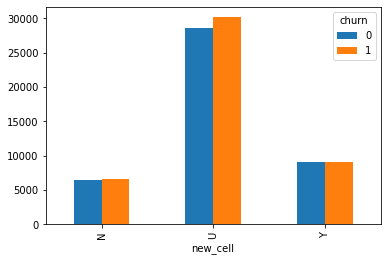

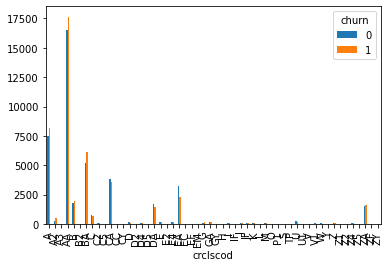

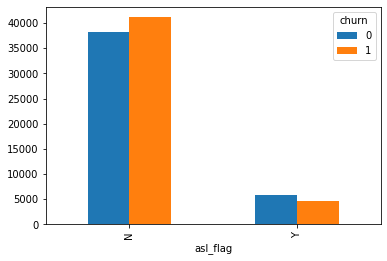

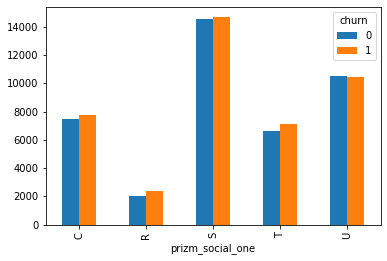

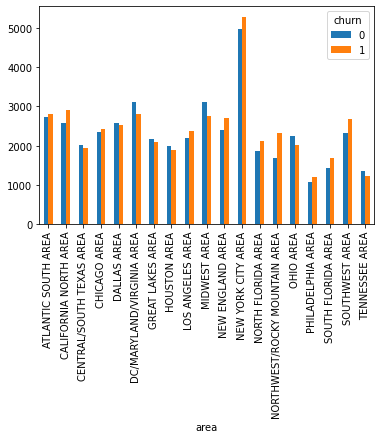

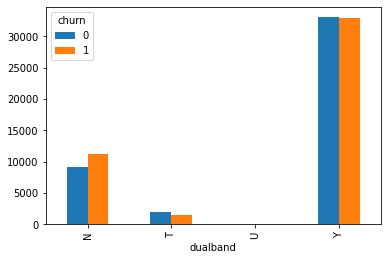

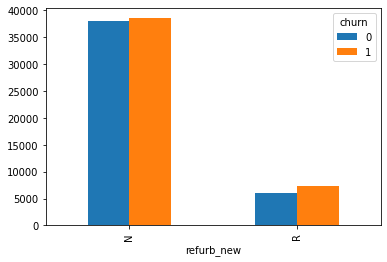

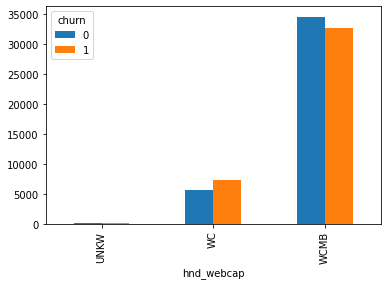

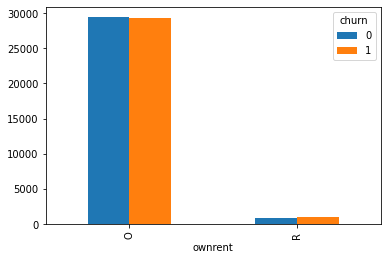

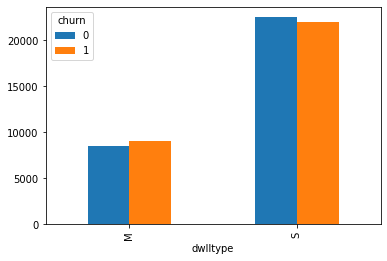

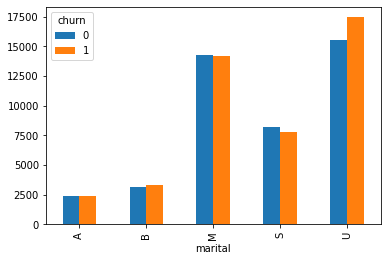

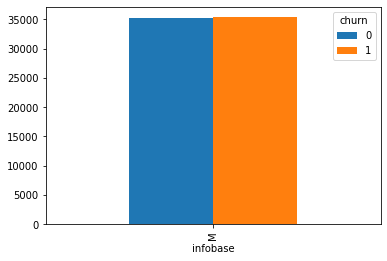

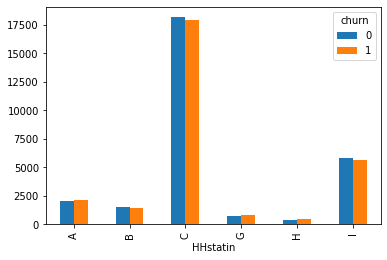

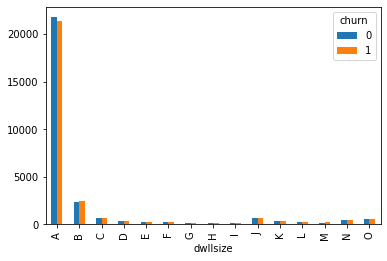

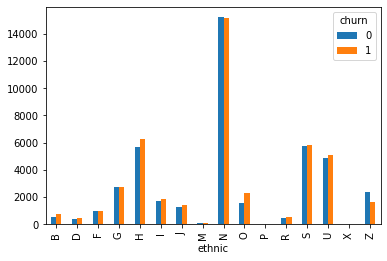

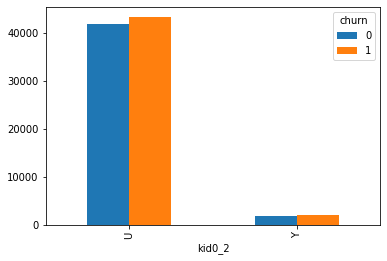

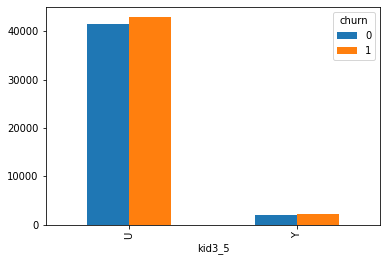

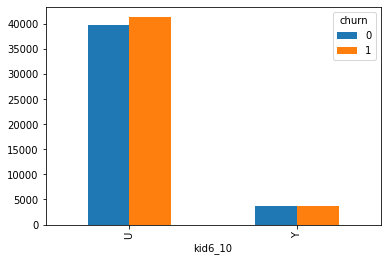

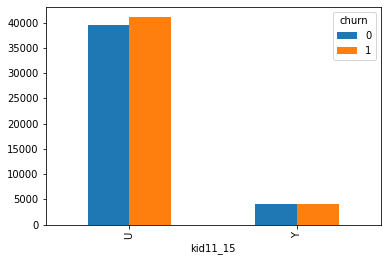

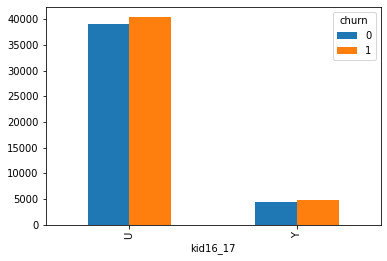

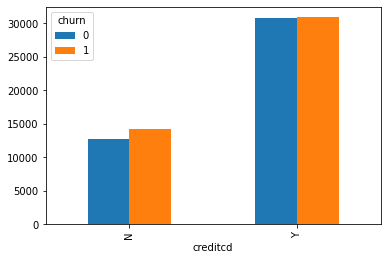

In [22]:
for i in df.select_dtypes(include='object').columns:
  cat_target_visual_relation(i)

Tanto en las variables categóricas, como en las numéricas, no hemos encontrado valores anómalos. Hemos decidido no modificar estas variables más allá que agrupar las de kids en una sola.

In [23]:
X['has_kids'] = np.where((X.filter(like = 'kid') == 'Y').any(axis=1), 'Y', 'U')

In [24]:
X = X.drop(X.filter(regex = '^kid').columns, axis=1)

In [25]:
df.head(5)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0


In [26]:
object_columns = X.select_dtypes(exclude = np.number).columns.tolist()

In [27]:
object_columns

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'infobase',
 'ethnic',
 'creditcd',
 'has_kids']

Creamos el segundo transformer, esta vez con las columnas categoricas. En este caso, los nulos los imputamos por la moda (most frequent) y posteriormente hacemos un One Hot Encoding.

In [28]:
from sklearn.preprocessing import FunctionTransformer

# Definimos una función que convierte valores negativos a 0
def replace_negatives(x):
    return np.maximum(x, 0)

# Creamos el transformador de funciones
neg_transformer = FunctionTransformer(replace_negatives, validate = False)

In [29]:
eqpdays_neg_transformer = ColumnTransformer(
  transformers = [
    ('neg_transformer', neg_transformer, ['eqpdays'])
  ],
  remainder='passthrough',
  verbose_feature_names_out=False
)

In [30]:
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ("encoder", OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
    ]
)

Creamos un pipe que contenga los pasos importantes del preprocessing (los dos transformers) para aplicarlo posteriormente cuando lo necesitemos.

In [31]:
col_transformers = ColumnTransformer(
    transformers=[
        ('num_transformer', numeric_transformer, numeric_columns),
        ('cat_transformer', categorical_transformer, object_columns)    
    ],
    verbose_feature_names_out=False
)

In [32]:
preprocessor = Pipeline(
  steps = [
    ('eqpdays_neg_transformer', eqpdays_neg_transformer),
    ('col_transformers', col_transformers)
  ]
)

In [33]:
preprocessor

Pipeline(steps=[('eqpdays_neg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('neg_transformer',
                                                  FunctionTransformer(func=<function replace_negatives at 0x7f49521ed0d0>),
                                                  ['eqpdays'])],
                                   verbose_feature_names_out=False)),
                ('col_transformers',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())...
                                                   'mou_cdat', ...]),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['new_cell', 'crclscod',
                                                   'asl_flag',
                                                   'prizm_social_one', 'area',
                                                   'dualband', 'refurb_new',
                                                   'hnd_webcap', 'marital',
                                                   'infobase', 'ethnic',
                                                   'creditcd', 'has_kids'])],
                                   verbose_feature_names_out=False))])

Aplicamos y guardamos el pipe.

In [34]:
X = preprocessor.fit_transform(X)

In [35]:
X

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,...,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,ethnic_B,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,creditcd_N,creditcd_Y,has_kids_U,has_kids_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,-0.745185,-0.552612,-1.001189,-0.290195,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,-0.529923,-0.355626,-0.588359,-0.042732,-0.314312,-0.028223,-0.549651,-0.055484,-0.572670,-0.095260,-0.133041,-0.021956,-0.526192,-0.093766,-0.320242,-0.357847,-0.342779,-0.198491,-0.268690,-0.508208,-0.077144,-0.074304,-0.715615,-0.579486,-0.484762,-0.437726,-0.283453,-0.086096,-0.188098,-0.089204,-0.446910,-0.087643,-0.453608,-0.060932,-0.563160,-0.574224,-0.528148,-0.022351,-0.266042,4.561470,0.406221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000002,-0.017815,-0.041738,-0.362082,-0.290195,-0.186268,-0.139197,-0.132876,-0.079985,-0.085154,2.016950,1.033021,0.295587,-0.042732,-0.282875,-0.028223,0.924287,-0.055484,0.784368,-0.095260,0.178714,-0.021956,0.743293,-0.093766,0.003479,0.163773,0.200885,0.438337,0.063614,-0.124281,-0.077144,-0.336027,0.650626,-0.074432,-0.086661,-0.346183,-0.032575,-0.086096,-0.466372,-0.089204,1.035215,-0.087643,0.044823,-0.060932,-0.032711,0.774298,0.731305,-0.022351,0.747827,4.015005,-0.506772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1000003,-0.897358,-0.957822,-1.237134,-0.404143,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,0.035228,0.021324,-0.626792,-0.042732,-0.377184,-0.028223,-0.647913,-0.055484,-0.851367,-0.095260,-0.624054,-0.021956,-0.859967,-0.093766,-0.320242,-0.357847,-0.342779,-0.519938,-0.268690,-0.839509,-0.077144,-0.681353,-0.715615,-0.579486,-0.484762,-0.437726,-0.801499,-0.086096,-0.807200,-0.089204,-0.703218,-0.087643,-0.693760,-0.060932,-0.629466,-0.851171,-0.859285,-0.022351,-0.329409,4.233591,-0.506772,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1000004,-0.441110,-0.963153,-0.337460,-0.404143,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,0.045386,0.021324,-0.665224,-0.042732,-0.377184,-0.028223,-0.719377,-0.055484,-0.885668,-0.095260,-0.612364,-0.021956,-0.879937,-0.093766,-0.320242,-0.357847,-0.342779,-0.501743,-0.268690,-0.827910,-0.077144,-0.678771,-0.705786,-0.574133,-0.484762,-0.437726,-0.837339,-0.086096,-0.816011,-0.089204,-0.673501,-0.087643,-0.670976,-0.060932,-0.651568,-0.885257,-0.879096,-0.022351,-0.329409,4.452177,-0.506772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [36]:
preprocessor

Pipeline(steps=[('eqpdays_neg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('neg_transformer',
                                                  FunctionTransformer(func=<function replace_negatives at 0x7f49521ed0d0>),
                                                  ['eqpdays'])],
                                   verbose_feature_names_out=False)),
                ('col_transformers',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())...
                                                   'mou_cdat', ...]),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['new_cell', 'crclscod',
                                                   'asl_flag',
                                                   'prizm_social_one', 'area',
                                                   'dualband', 'refurb_new',
                                                   'hnd_webcap', 'marital',
                                                   'infobase', 'ethnic',
                                                   'creditcd', 'has_kids'])],
                                   verbose_feature_names_out=False))])

In [37]:
pickle.dump(preprocessor, open(FOLDER_PATH + '/data/pipeline.pkl', 'wb'))

In [38]:
X

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,...,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,ethnic_B,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,creditcd_N,creditcd_Y,has_kids_U,has_kids_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,-0.745185,-0.552612,-1.001189,-0.290195,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,-0.529923,-0.355626,-0.588359,-0.042732,-0.314312,-0.028223,-0.549651,-0.055484,-0.572670,-0.095260,-0.133041,-0.021956,-0.526192,-0.093766,-0.320242,-0.357847,-0.342779,-0.198491,-0.268690,-0.508208,-0.077144,-0.074304,-0.715615,-0.579486,-0.484762,-0.437726,-0.283453,-0.086096,-0.188098,-0.089204,-0.446910,-0.087643,-0.453608,-0.060932,-0.563160,-0.574224,-0.528148,-0.022351,-0.266042,4.561470,0.406221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000002,-0.017815,-0.041738,-0.362082,-0.290195,-0.186268,-0.139197,-0.132876,-0.079985,-0.085154,2.016950,1.033021,0.295587,-0.042732,-0.282875,-0.028223,0.924287,-0.055484,0.784368,-0.095260,0.178714,-0.021956,0.743293,-0.093766,0.003479,0.163773,0.200885,0.438337,0.063614,-0.124281,-0.077144,-0.336027,0.650626,-0.074432,-0.086661,-0.346183,-0.032575,-0.086096,-0.466372,-0.089204,1.035215,-0.087643,0.044823,-0.060932,-0.032711,0.774298,0.731305,-0.022351,0.747827,4.015005,-0.506772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1000003,-0.897358,-0.957822,-1.237134,-0.404143,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,0.035228,0.021324,-0.626792,-0.042732,-0.377184,-0.028223,-0.647913,-0.055484,-0.851367,-0.095260,-0.624054,-0.021956,-0.859967,-0.093766,-0.320242,-0.357847,-0.342779,-0.519938,-0.268690,-0.839509,-0.077144,-0.681353,-0.715615,-0.579486,-0.484762,-0.437726,-0.801499,-0.086096,-0.807200,-0.089204,-0.703218,-0.087643,-0.693760,-0.060932,-0.629466,-0.851171,-0.859285,-0.022351,-0.329409,4.233591,-0.506772,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1000004,-0.441110,-0.963153,-0.337460,-0.404143,-0.421051,-0.441516,-0.439301,-0.079985,-0.085154,0.045386,0.021324,-0.665224,-0.042732,-0.377184,-0.028223,-0.719377,-0.055484,-0.885668,-0.095260,-0.612364,-0.021956,-0.879937,-0.093766,-0.320242,-0.357847,-0.342779,-0.501743,-0.268690,-0.827910,-0.077144,-0.678771,-0.705786,-0.574133,-0.484762,-0.437726,-0.837339,-0.086096,-0.816011,-0.089204,-0.673501,-0.087643,-0.670976,-0.060932,-0.651568,-0.885257,-0.879096,-0.022351,-0.329409,4.452177,-0.506772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

## Remove High-Correlation

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altmente correlacionada (>95% o >99%...) en el dataset (df)

In [39]:
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [40]:
highly_corr = highly_correlated(X, y, 0.95)

In [41]:
X.drop(axis=1, columns=highly_corr['F_to_delete'], inplace=True)

## Remove Low-Variance

* Eliminamos variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
vt = VarianceThreshold(threshold = 0.01) # Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(X)
cols_lowvar = X.columns[vt.get_support()==False]
print(len(cols_lowvar),' low variance features will be removed:\n', cols_lowvar.to_list())

51  low variance features will be removed:
 ['crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EF', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_IF', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_S', 'crclscod_TP', 'crclscod_U', 'crclscod_U1', 'crclscod_V', 'crclscod_V1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZF', 'crclscod_ZY', 'dualband_U', 'infobase_M', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [44]:
X.drop(columns=cols_lowvar,inplace=True)

In [45]:
features = X.columns

In [46]:
features

Index(['rev', 'mou', 'totmrc', 'da', 'vceovr', 'datovr', 'roam', 'change_mou',
       'change_rev', 'drop_vce',
       ...
       'ethnic_I', 'ethnic_J', 'ethnic_N', 'ethnic_O', 'ethnic_R', 'ethnic_S',
       'ethnic_U', 'ethnic_Z', 'creditcd_Y', 'has_kids_Y'],
      dtype='object', length=119)

Guardamos las features que nos han quedado despues de todo el preprocessing. Después de comprobar y eliminar las columnas con una alta correlación y las variables con baja varianza, lo que se refiere a un threshold mínimo.

In [47]:
pickle.dump(features, open(FOLDER_PATH + '/data/features.pkl', 'wb'))

In [48]:
X.shape

(90000, 119)

# Save cleaned dataset

Juntamos el target y las features ya tratadas para tener el dataset final.

In [49]:
df = pd.merge(left = X, right = y, how = 'left', on = 'Customer_ID')

<Axes: xlabel='churn', ylabel='Count'>

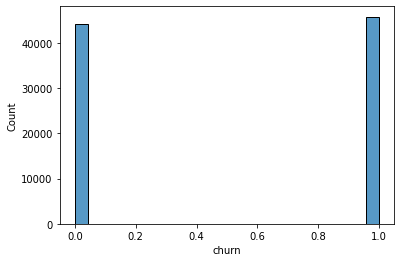

In [50]:
sns.histplot(df['churn'])

In [51]:
df.to_csv(FOLDER_PATH + '/data/clean_data.csv')